In [1]:
pip install matplotlib numpy pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
f_path = "C:/Users/bpssi/OneDrive/Desktop/MRM/Tasks/CarPrice_Assignment.csv"
df = pd.read_csv(f_path)

In [15]:
print(df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [16]:
X = df['horsepower'].values
y = df['price'].values

X = X[~np.isnan(X)]
y = y[:len(X)] 

In [17]:
X = (X - np.mean(X)) / np.std(X)

alpha = 0.1  
iterations = 1000  
m = len(y)  


w = 0
b = 0


In [18]:
def hypothesis(X, w, b):
    return w * X + b



In [19]:
def compute_cost(X, y, w, b):
    return (1/(2*m)) * np.sum((hypothesis(X, w, b) - y) ** 2)

In [20]:
def gradient_descent(X, y, w, b, alpha, iterations):
    cost_history = []
    
    for i in range(iterations):
        dw = (1/m) * np.sum((hypothesis(X, w, b) - y) * X)
        db = (1/m) * np.sum(hypothesis(X, w, b) - y)
        
        w -= alpha * dw
        b -= alpha * db
        
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")
    
    return w, b, cost_history

In [21]:
final_w, final_b, cost_history = gradient_descent(X, y, w, b, alpha, iterations)

print(f"Final parameters: w = {final_w}, b = {final_b}")

Iteration 0: Cost = 99204587.6156315
Iteration 100: Cost = 11016254.913372533
Iteration 200: Cost = 11016254.851154964
Iteration 300: Cost = 11016254.851154964
Iteration 400: Cost = 11016254.851154964
Iteration 500: Cost = 11016254.851154964
Iteration 600: Cost = 11016254.851154964
Iteration 700: Cost = 11016254.851154964
Iteration 800: Cost = 11016254.851154964
Iteration 900: Cost = 11016254.851154964
Final parameters: w = 6440.335877099258, b = 13276.710570731699


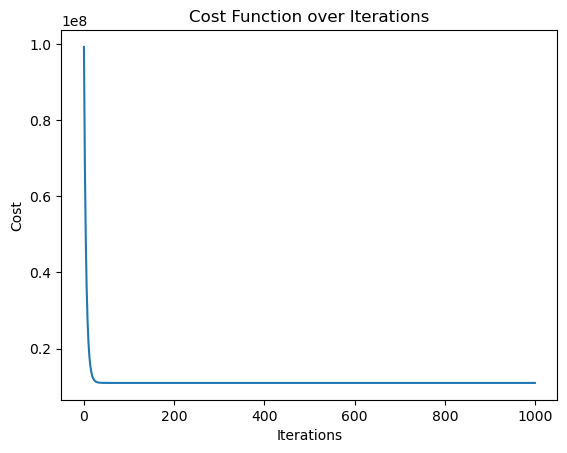

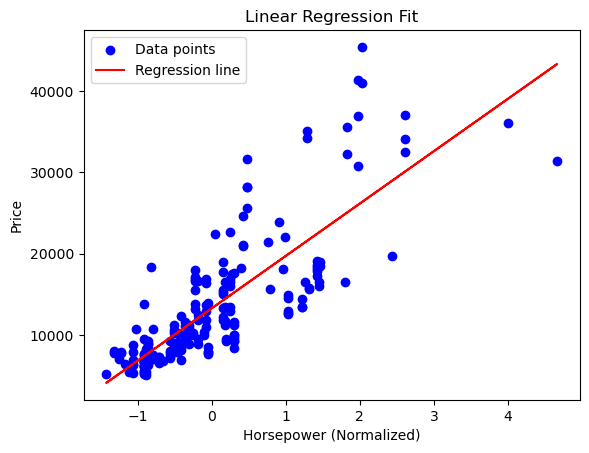

In [13]:
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, hypothesis(X, final_w, final_b), color='red', label='Regression line')
plt.xlabel('Horsepower (Normalized)')
plt.ylabel('Price')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()